### Website for plot comparisons:
http://www.astro.utu.fi/~cflynn/galdyn/lecture4.html

### Imports 

In [54]:
import sympy as sp
import numpy as np
from sympy import init_printing,pprint
# from pprint import pprint
from sympy.abc import rho,sigma,G, pi,phi
import pprint
init_printing() 
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.linewidth'] = 2


### Constants  

In [55]:
G_cgs     = 6.67e-8 # grav constant
k_boltz_cgs   = 1.380649e-16
solar_mass_cgs = 2e33 #grams
solar_temp_cgs = 5778 #Kelvin

### Symbolic math for isothermal sphere density & potentials, to put into functions.. 

In [56]:
r = sp.symbols('r')
expr_2 = pow(sigma,2) / (2* pi*G*pow(r,2))
rho_eq = sp.Eq(rho, expr)

expr_2   = pow(sigma,2) / ((2* pi*G))
expr_phi = sp.Mul(sp.exp( ( (4 * G * pi ) / (sigma ** 2)) * phi )) * expr_2 
rho_eq_2 = sp.Eq(rho, expr_phi)

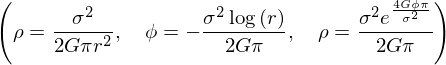

In [127]:
rho_first_int = sp.integrate(expr,r)
phi_eq = sp.integrate(rho_first_int,r)
phi_eq = sp.Eq(phi, phi_eq)
rho_eq,phi_eq,rho_eq_2

### Isothermal Sphere Functions 

In [143]:
###### ISOTHERMAL SPHERE ##### PHI (r) ### ANALYTIC EQ
def phi_iso_sphere_of_r_analytic_py(_r,_k_boltz=1,_Grav_const=1,_mean_mass=1,_temp=1):
    _sigma = np.sqrt((_k_boltz*_temp)/_mean_mass)
    calc = -1*(((_sigma ** 2.0) * np.log(_r)) / (2 * _Grav_const * np.pi))
    return calc

###### ISOTHERMAL SPHERE ##### RHO (r) ### ANALYTIC EQ
def rho_iso_sphere_of_r_analytic_py(_r,_k_boltz=1,_Grav_const=1,_mean_mass=1,_temp=1):
    _sigma = np.sqrt((_k_boltz*_temp)/_mean_mass)
    calc = (_sigma ** 2.0) / (2 * _Grav_const * np.pi * (_r**(2.0)))
    return calc

###### ISOTHERMAL SPHERE ##### RHO (phi) ### ANALYTIC EQ
def rho_iso_sphere_of_phi_analytic_py(_r,phi_func=phi_iso_sphere_of_r_analytic_py,_k_boltz=1,_Grav_const=1,_mean_mass=1,_temp=1):
    _phi = -1*phi_func(_r)
    _sigma = np.sqrt((_k_boltz*_temp)/_mean_mass)
    exp_term = np.exp( ( (4 * _Grav_const * np.pi ) / (_sigma ** 2.0)) * _phi )
    calc = ((_sigma ** 2.0) / (2 * _Grav_const * np.pi )) * exp_term
    return calc

###### ISOTHERMAL SPHERE ##### RHO (r) ### COMPUTATIONAL EQ
def rho_iso_sphere_of_r_computational_py(_r,phi_func=phi_iso_sphere_of_r_analytic_py,_deriv_func=np.diff):
    first_der = _deriv_func(phi_func(_r))
    second_der = _deriv_func(first_der)
    return second_der

###### ISOTHERMAL SPHERE ##### MASS (r) ### COMPUTATIONAL EQ
def mass_iso_sphere_of_r_computational_py(_r,phi_func=phi_iso_sphere_of_r_analytic_py):
    first_der = np.gradient(phi_func(_r))
    return first_der

###### ISOTHERMAL SPHERE ##### Vcirc (r) ### ANALYTIC EQ
def vcirc_iso_sphere_of_r_analytic_py(_r,_k_boltz=1,_Grav_const=1,_mean_mass=1,_temp=1):
    holder = np.zeros(_r.size)
    constants = np.sqrt((_k_boltz * _temp) / (2 * np.pi * _Grav_const))
    return holder + constants

In [177]:
r_array = np.linspace(0.1,5e22,100) #0 to MW radius
r_array_2 = np.linspace(0.1,40,10000) #0 to 40

### Isothermal Sphere; All constants = 1 (except pi) 

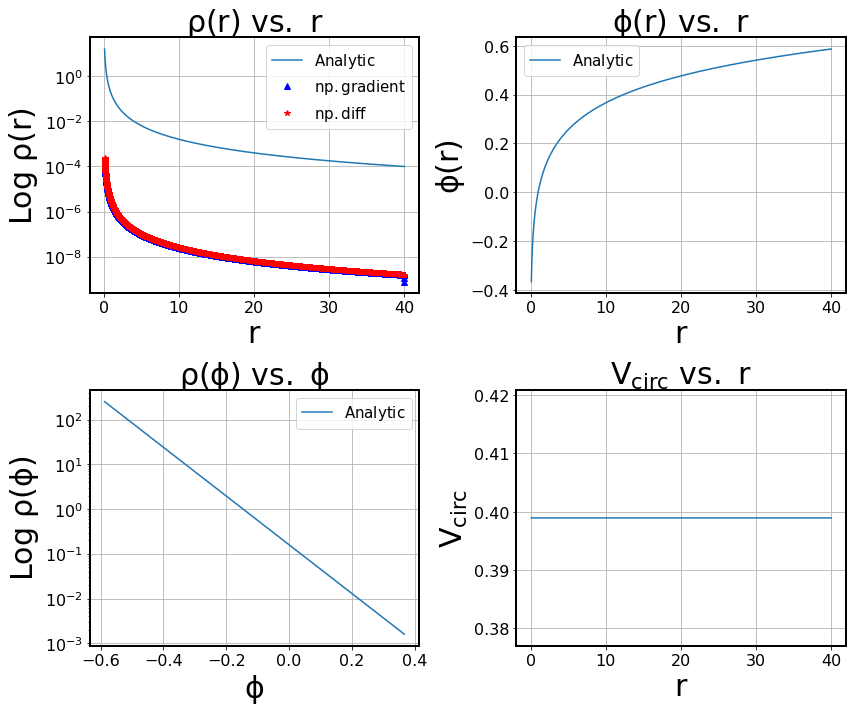

In [178]:
#create figure object
fig = plt.figure(1)
fig.set_figheight(10)
fig.set_figwidth(12)

#create axis object
ax = plt.subplot(221)
plt.grid(True)

##ploting
plt.plot(r_array_2,rho_iso_sphere_of_r_analytic_py(r_array_2),label=r'$\mathrm{Analytic}$')
plt.plot(r_array_2,rho_iso_sphere_of_r_computational_py(r_array_2,_deriv_func=np.gradient),'b^',label=r'$\mathrm{np.gradient}$')
plt.plot(r_array_2[:-2],rho_iso_sphere_of_r_computational_py(r_array_2,_deriv_func=np.diff),'r*',label=r'$\mathrm{np.diff}$')


#labeling
plt.title(r'$\mathrm{\rho(r)\ vs.\ r}$',size=30)
plt.xlabel(r'$\mathrm{r}$',size=30)
plt.ylabel(r'$\mathrm{ Log\ \rho(r) }$',size=30)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
plt.semilogy()
plt.legend(fontsize=15)
plt.tight_layout()


#create axis space
ax = plt.subplot(222)
plt.grid(True)

##ploting
plt.plot(r_array_2,-1*phi_iso_sphere_of_r_analytic_py(r_array_2),label=r'$\mathrm{Analytic}$')
# plt.plot(r_array_2,rho_computational_py(r_array_2),label=r'$\mathrm{Computational}$')

#labeling
plt.title(r'$\mathrm{\phi(r)\ vs.\ r}$',size=30)
plt.xlabel(r'$\mathrm{r}$',size=30)
plt.ylabel(r'$\mathrm{\phi(r)}$',size=30)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
# plt.semilogy()
plt.legend(fontsize=15)
plt.tight_layout()


#create axis space
ax = plt.subplot(223)
plt.grid(True)

##ploting
plt.plot(phi_iso_sphere_of_r_analytic_py(r_array_2),rho_iso_sphere_of_phi_analytic_py(r_array_2),label=r'$\mathrm{Analytic}$')
# plt.plot(r_array_2,rho_computational_py(r_array_2),label=r'$\mathrm{Computational}$')

#labeling
plt.title(r'$\mathrm{\rho(\phi)\ vs.\ \phi}$',size=30)
plt.xlabel(r'$\mathrm{\phi}$',size=30)
plt.ylabel(r'$\mathrm{ Log\ \rho(\phi) }$',size=30)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
plt.semilogy()
# plt.semilogx()
plt.legend(fontsize=15)
plt.tight_layout()

#create axis space
ax = plt.subplot(224)
plt.grid(True)

##ploting
plt.plot(r_array_2,vcirc_iso_sphere_of_r_analytic_py(r_array_2))
# plt.plot(r_array_2,rho_computational_py(r_array_2),label=r'$\mathrm{Computational}$')

#labeling
plt.title(r'$\mathrm{V_{circ}\ vs.\ r}$',size=30)
plt.xlabel(r'$\mathrm{r}$',size=30)
plt.ylabel(r'$\mathrm{V_{circ}}$',size=30)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
# plt.semilogy()
# plt.legend(fontsize=15)
plt.tight_layout()




### Isothermal Sphere: Density vs potential and it's derivatives

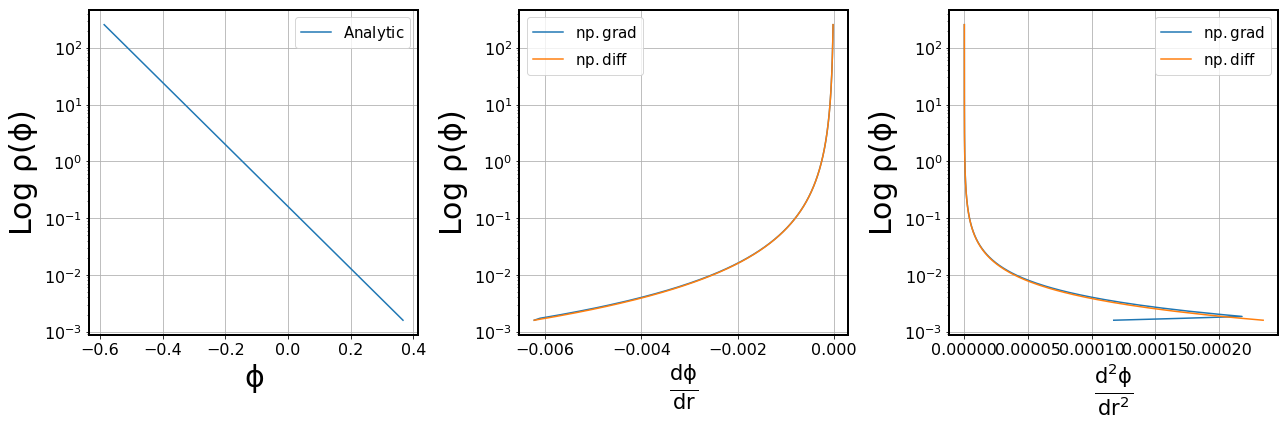

In [201]:
fig = plt.figure(2)
fig.set_figheight(6)
fig.set_figwidth(18)

#create axis object
ax = plt.subplot(131)
plt.grid(True)

##ploting
plt.plot(phi_iso_sphere_of_r_analytic_py(r_array_2),rho_iso_sphere_of_phi_analytic_py(r_array_2),label=r'$\mathrm{Analytic}$')

#labeling
# plt.title(r'$\mathrm{\rho(r)\ vs.\ r}$',size=30)
plt.xlabel(r'$\mathrm{\phi}$',size=30)
plt.ylabel(r'$\mathrm{ Log\ \rho(\phi) }$',size=30)

ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
plt.semilogy()
plt.legend(fontsize=15)
plt.tight_layout()

#create axis object
ax = plt.subplot(132)
plt.grid(True)

first_deriv_grad = np.gradient(phi_iso_sphere_of_r_analytic_py(r_array_2))
first_deriv_diff = np.diff(phi_iso_sphere_of_r_analytic_py(r_array_2))
##ploting
plt.plot(first_deriv_grad,rho_iso_sphere_of_phi_analytic_py(r_array_2),label=r'$\mathrm{np.grad}$')
plt.plot(first_deriv_diff,rho_iso_sphere_of_phi_analytic_py(r_array_2)[:-1],label=r'$\mathrm{np.diff}$')

#labeling
# plt.title(r'$\mathrm{\rho(r)\ vs.\ r}$',size=30)
plt.xlabel(r'$\mathrm{\frac{\mathrm{d} \phi}{\mathrm{d}r}}$',size=30)
plt.ylabel(r'$\mathrm{Log\ \rho(\phi) }$',size=30)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
plt.semilogy()
plt.legend(fontsize=15)
plt.tight_layout()

ax = plt.subplot(133)
plt.grid(True)

second_deriv_grad = np.gradient(first_deriv_grad)
second_deriv_diff = np.diff(first_deriv_diff)
##ploting
plt.plot(second_deriv_grad,rho_iso_sphere_of_phi_analytic_py(r_array_2),label=r'$\mathrm{np.grad}$')
plt.plot(second_deriv_diff,rho_iso_sphere_of_phi_analytic_py(r_array_2)[:-2],label=r'$\mathrm{np.diff}$')

#labeling
# plt.title(r'$\mathrm{\rho(r)\ vs.\ r}$',size=30)
plt.xlabel(r'$\mathrm{\frac{\mathrm{d}^2 \phi}{\mathrm{d}r^2}}$',size=30)
plt.ylabel(r'$\mathrm{Log\ \rho(\phi) }$',size=30)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
plt.semilogy()
# plt.semilogx()
plt.legend(fontsize=15)
plt.tight_layout()


# plt.xlabel(r'$\mathrm{\frac{\mathrm{d}^2 \omega}{\mathrm{d}\theta^2}}$',size=30)

In [180]:
# fig = plt.figure(3)
# fig.set_figheight(6)
# fig.set_figwidth(12)

# #create axis space
# ax = plt.subplot(111)
# plt.grid(True)

# ##ploting
# plt.hist(rho_iso_sphere_of_r_analytic_py(r_array_2)[3:]/rho_iso_sphere_of_r_computational_py(r_array_2)[3:],label=r'$\mathrm{Analytic/Computational}$')

# #labeling
# plt.title(r'$\mathrm{Isothermal\ Sphere}$',size=30)
# plt.xlabel(r'$\mathrm{Factor}$',size=30)
# plt.ylabel(r'$\mathrm{Counts}$',size=30)
# ax.tick_params(axis='x', which='major', labelsize=16)
# ax.tick_params(axis='y', which='major', labelsize=16)
# plt.legend(fontsize=15)
# plt.tight_layout()


## Plummer Potential; All constants 1 except for pi 

### Symbolic math for Plummer sphere density & potentials, to put into functions.. 

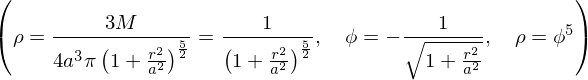

In [181]:
r_plum, a_plum, M_plum = sp.symbols(('r','a','M'),evaluate=False)
plummer_constants = sp.Mul(3,M_plum,evaluate=False)/sp.Mul(4*pi,pow(a_plum,3),evaluate=False)
expr_plum = plummer_constants* pow((1+pow((r_plum/a_plum),2)),sp.Rational(-5/2))
expr_plum2 = pow((1+pow((r_plum/a_plum),2)),sp.Rational(-5/2))

rho_eq_plum = sp.Eq(rho, expr_plum,evaluate=False)
rho_eq_plum = sp.Eq(rho_eq_plum, expr_plum2,evaluate=False)
# phi_eq_plum = sp.integrate(sp.integrate(rho_eq_plum,r),r)
phi_eq_plum_int = sp.Eq(phi, phi_eq_plum,evaluate=True)

phi_eq_plum_int = pow((1+pow((r_plum/a_plum),2)),sp.Rational(-1/2))
phi_eq_plum = sp.Eq(phi, -1*phi_eq_plum_int,evaluate=False)


rho_eq_plum_2 = sp.Eq(rho, phi**5,evaluate=False)

rho_eq_plum,phi_eq_plum,rho_eq_plum_2

### Plummer Potential/Density Functions (w/o most prefactors) 

In [182]:
###### PLUMMER SPHERE ##### PHI (r) ### ANALYTIC EQ
def phi_plum_sphere_of_r_analytic_py(_r,_a_plum=1,_Grav_const=1,_mean_mass=1):
    calc = pow((1+pow((_r/_a_plum),2)),-1/2)
    return calc

###### PLUMMER SPHERE ##### RHO (r) ### ANALYTIC EQ
def rho_plum_sphere_of_r_analytic_py(_r,_a_plum=1,_Grav_const=1,_mean_mass=1) :
    calc = pow((1+pow((_r/_a_plum),2)),-5/2)
    return calc

###### PLUMMER SPHERE ##### RHO (phi) ### ANALYTIC EQ
def rho_plum_sphere_of_phi_analytic_py(_r,phi_func=phi_plum_sphere_of_r_analytic_py,_Grav_const=1,_mean_mass=1):
    calc = np.abs(-1*phi_func(_r)**5)
    return calc

###### PLUMMER SPHERE ##### RHO (r) ### COMPUTATIONAL EQ
def rho_plum_sphere_of_r_computational_py(_r,phi_func=phi_plum_sphere_of_r_analytic_py,_deriv_func=np.diff):
    first_der = _deriv_func(phi_func(_r))
    second_der = _deriv_func(first_der)
    return second_der

###### PLUMMER SPHERE ##### MASS (r) ### COMPUTATIONAL EQ
def mass_plum_sphere_of_r_computational_py(_r,phi_func=phi_plum_sphere_of_r_analytic_py, _deriv_func=np.diff):
    first_der = _deriv.func(phi_func(_r))
    return first_der

###### PLUMMER SPHERE ##### Vcirc (r) ### ANALYTIC EQ
def vcirc_plum_sphere_of_r_analytic_py(_r,_a_plum=1,_Grav_const=1,_mean_mass=1):
    holder = np.zeros(_r.size)
    constants = _r * pow((1+pow((_r/_a_plum),2)),-3/4)
    return holder + constants

### Plummer Potential

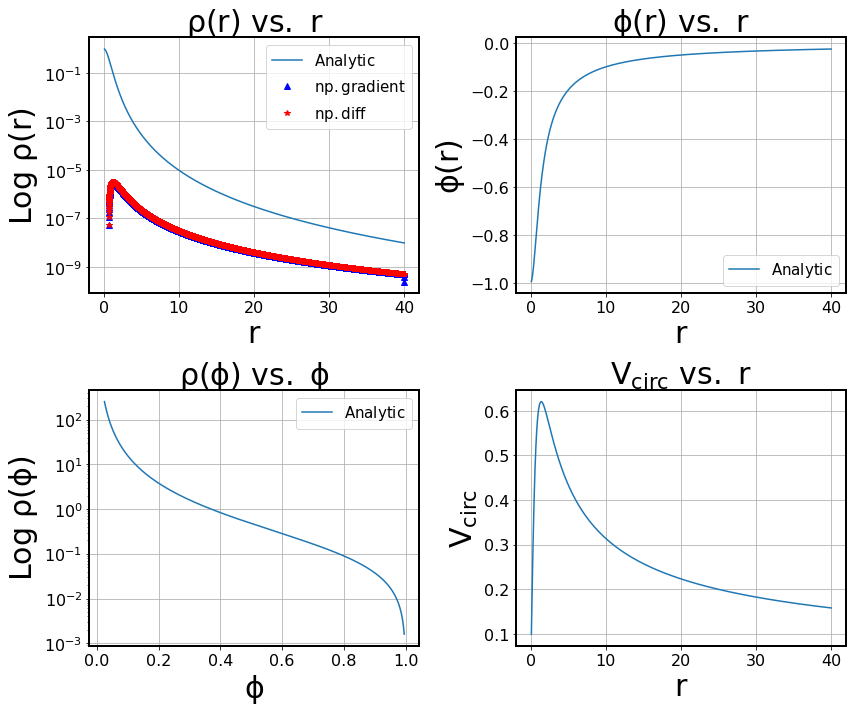

In [183]:
#create figure object
fig = plt.figure(4)
fig.set_figheight(10)
fig.set_figwidth(12)

#create axis object
ax = plt.subplot(221)
plt.grid(True)

##ploting
plt.plot(r_array_2,rho_plum_sphere_of_r_analytic_py(r_array_2),label=r'$\mathrm{Analytic}$')
plt.plot(r_array_2,rho_plum_sphere_of_r_computational_py(r_array_2,_deriv_func=np.gradient),'b^',label=r'$\mathrm{np.gradient}$')
plt.plot(r_array_2[:-2],rho_plum_sphere_of_r_computational_py(r_array_2,_deriv_func=np.diff),'r*',label=r'$\mathrm{np.diff}$')

#labeling
plt.title(r'$\mathrm{\rho(r)\ vs.\ r}$',size=30)
plt.xlabel(r'$\mathrm{r}$',size=30)
plt.ylabel(r'$\mathrm{ Log\ \rho(r) }$',size=30)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
plt.semilogy()
plt.legend(fontsize=15)
plt.tight_layout()


#create axis space
ax = plt.subplot(222)
plt.grid(True)

##ploting
plt.plot(r_array_2,-1*phi_plum_sphere_of_r_analytic_py(r_array_2),label=r'$\mathrm{Analytic}$')
# plt.plot(r_array_2,rho_computational_py(r_array_2),label=r'$\mathrm{Computational}$')

#labeling
plt.title(r'$\mathrm{\phi(r)\ vs.\ r}$',size=30)
plt.xlabel(r'$\mathrm{r}$',size=30)
plt.ylabel(r'$\mathrm{\phi(r)}$',size=30)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
# plt.semilogy()
plt.legend(fontsize=15)
plt.tight_layout()


#create axis space
ax = plt.subplot(223)
plt.grid(True)

##ploting
plt.plot(phi_plum_sphere_of_r_analytic_py(r_array_2),rho_iso_sphere_of_phi_analytic_py(r_array_2),label=r'$\mathrm{Analytic}$')
# plt.plot(r_array_2,rho_computational_py(r_array_2),label=r'$\mathrm{Computational}$')

#labeling
plt.title(r'$\mathrm{\rho(\phi)\ vs.\ \phi}$',size=30)
plt.xlabel(r'$\mathrm{\phi}$',size=30)
plt.ylabel(r'$\mathrm{ Log\ \rho(\phi) }$',size=30)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
plt.semilogy()
# plt.semilogx()
plt.legend(fontsize=15)
plt.tight_layout()

#create axis space
ax = plt.subplot(224)
plt.grid(True)

##ploting
plt.plot(r_array_2,vcirc_plum_sphere_of_r_analytic_py(r_array_2))
# plt.plot(r_array_2,rho_computational_py(r_array_2),label=r'$\mathrm{Computational}$')

#labeling
plt.title(r'$\mathrm{V_{circ}\ vs.\ r}$',size=30)
plt.xlabel(r'$\mathrm{r}$',size=30)
plt.ylabel(r'$\mathrm{V_{circ}}$',size=30)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
# plt.semilogy()
# plt.legend(fontsize=15)
plt.tight_layout()




### Plummer: Density vs potential and it's derivatives

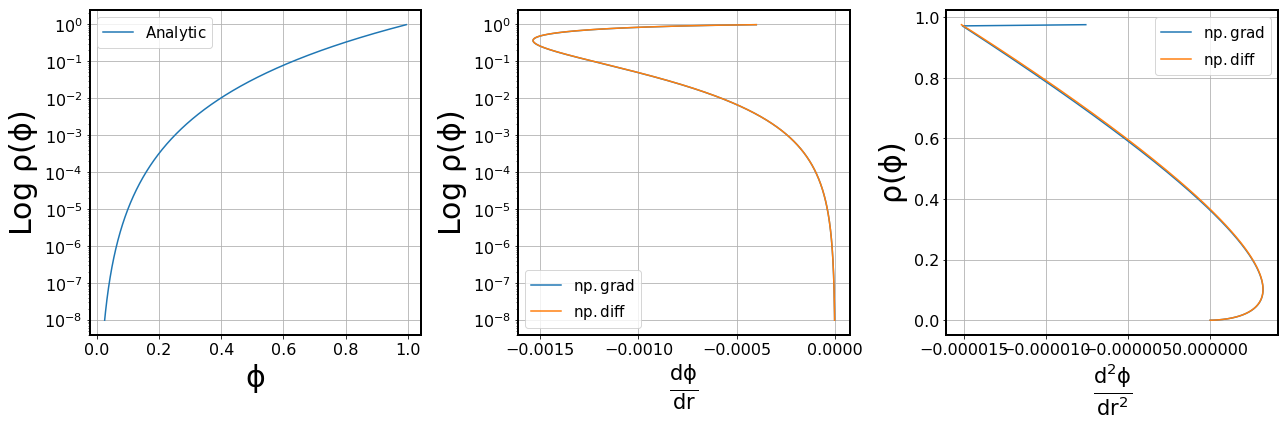

In [209]:
fig = plt.figure(5)
fig.set_figheight(6)
fig.set_figwidth(18)

#create axis object
ax = plt.subplot(131)
plt.grid(True)

##ploting
plt.plot(phi_plum_sphere_of_r_analytic_py(r_array_2),rho_plum_sphere_of_phi_analytic_py(r_array_2),label=r'$\mathrm{Analytic}$')

#labeling
# plt.title(r'$\mathrm{\rho(r)\ vs.\ r}$',size=30)
plt.xlabel(r'$\mathrm{\phi}$',size=30)
plt.ylabel(r'$\mathrm{ Log\ \rho(\phi) }$',size=30)

ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
plt.semilogy()
plt.legend(fontsize=15)
plt.tight_layout()

#create axis object
ax = plt.subplot(132)
plt.grid(True)

first_deriv_grad = np.gradient(phi_plum_sphere_of_r_analytic_py(r_array_2))
first_deriv_diff = np.diff(phi_plum_sphere_of_r_analytic_py(r_array_2))
##ploting
plt.plot(first_deriv_grad,rho_plum_sphere_of_phi_analytic_py(r_array_2),label=r'$\mathrm{np.grad}$')
plt.plot(first_deriv_diff,rho_plum_sphere_of_phi_analytic_py(r_array_2)[:-1],label=r'$\mathrm{np.diff}$')

#labeling
# plt.title(r'$\mathrm{\rho(r)\ vs.\ r}$',size=30)
plt.xlabel(r'$\mathrm{\frac{\mathrm{d} \phi}{\mathrm{d}r}}$',size=30)
plt.ylabel(r'$\mathrm{Log\ \rho(\phi) }$',size=30)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
plt.semilogy()
plt.legend(fontsize=15)
plt.tight_layout()

ax = plt.subplot(133)
plt.grid(True)

second_deriv_grad = np.gradient(first_deriv_grad)
second_deriv_diff = np.diff(first_deriv_diff)
##ploting
plt.plot(second_deriv_grad,rho_plum_sphere_of_phi_analytic_py(r_array_2),label=r'$\mathrm{np.grad}$')
plt.plot(second_deriv_diff,rho_plum_sphere_of_phi_analytic_py(r_array_2)[:-2],label=r'$\mathrm{np.diff}$')

#labeling
# plt.title(r'$\mathrm{\rho(r)\ vs.\ r}$',size=30)
plt.xlabel(r'$\mathrm{\frac{\mathrm{d}^2 \phi}{\mathrm{d}r^2}}$',size=30)
plt.ylabel(r'$\mathrm{\rho(\phi) }$',size=30)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)

# plt.semilogx()
plt.legend(fontsize=15)
plt.tight_layout()


# plt.xlabel(r'$\mathrm{\frac{\mathrm{d}^2 \omega}{\mathrm{d}\theta^2}}$',size=30)